## Run likelihood scan for $A_s$, using full_theory

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 140
mpl.rcParams['figure.dpi'] = 140
# our modules
import data_MPGADGET
import p1d_arxiv
import gp_emulator
import likelihood
import likelihood_parameter
import lya_theory
import full_theory
import camb_cosmo
import CAMB_model
import fit_linP

In [2]:
# specify verbosity for all objects (except emulator)
verbose=False

### Setup mock data, from one of simulations in the suite

In [3]:
# specify simulation suite and P1D mesurements
basedir="/p1d_emulator/sim_suites/Australia20/"
skewers_label='Ns500_wM0.05'
p1d_label=None
# specify simulation to use to generate synthetic data
test_sim_num=30
data=data_MPGADGET.P1D_MPGADGET(sim_number=test_sim_num,basedir=basedir,skewers_label=skewers_label,data_cov_factor=1)

### Setup archive of P1D measurements from simulations and train the emulator

In [4]:
# specify redshift range
z_max=4
# do not use test_sim_num that was used in generating mock data
arxiv=p1d_arxiv.ArxivP1D(basedir=basedir,drop_sim_number=test_sim_num,
                            drop_tau_rescalings=True,z_max=z_max,
                            drop_temp_rescalings=True,skewers_label=skewers_label)

In [5]:
# specify parameters to be used in emulator
paramList=['mF', 'sigT_Mpc', 'gamma', 'kF_Mpc', 'Delta2_p', 'n_p']
# specify k range
kmax_Mpc=8
# setup GP emulator
emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,z_max=z_max,
                                verbose=False,paramList=paramList,train=True,
                                emu_type="k_bin",passArxiv=arxiv,kmax_Mpc=kmax_Mpc,
                                drop_tau_rescalings=True,
                                drop_temp_rescalings=True)

 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Training GP on 270 points
Optimised


### Setup likelihood object, with full theory, and using the truth as fiducial model

In [6]:
free_params=["As"]
like=likelihood.Likelihood(data=data,emulator=emu,
                            free_parameters=free_params,
                            free_param_limits=None,
                            verbose=verbose,
                            prior_Gauss_rms=0.15,
                            emu_cov_factor=1)

In [7]:
# print default cosmology
for par in like.theory.camb_model_fid.get_likelihood_parameters():
    print(par.info_str(),', in cube =',par.value_in_cube())

ombh2 = 0.022000140100000003 , in cube = 0.5000233500000004
omch2 = 0.11999994800000002 , in cube = 0.39999896000000046
As = 2.006055e-09 , in cube = 0.030274999999999712
ns = 0.967565 , in cube = 0.5855000000000012
H0 = 67.0 , in cube = 0.2857142857142857
mnu = 0.0 , in cube = 0.0


In [8]:
values=[0.030275]

In [9]:
for par in like.parameters_from_sampling_point(values=values):
    print(par.info_str(),',',par.value_in_cube())
like.get_log_like(values=values,ignore_log_det_cov=False)

As = 2.006055e-09 , 0.030274999999999712


147.12218129457415

In [12]:
N=50
list_As=[]
list_log_like=[]
for value in np.linspace(0,1.0,N):
    values=[value]
    As=like.parameters_from_sampling_point(values=values)[0].value
    log_like=like.get_log_like(values=values,ignore_log_det_cov=True)
    list_As.append(As)
    list_log_like.append(log_like)
    print(As,log_like)

2e-09 -4.361074071120589
2.0040816326530615e-09 -3.9368622440227696
2.0081632653061224e-09 -3.5459301259674487
2.0122448979591837e-09 -3.1883208419238414
2.016326530612245e-09 -2.8640317744994612
2.0204081632653064e-09 -2.573015006670995
2.0244897959183673e-09 -2.3151776917666806
2.0285714285714286e-09 -2.090382553963255
2.03265306122449e-09 -1.8984486314279725
2.0367346938775513e-09 -1.739152211800929
2.040816326530612e-09 -1.6122277860710557
2.0448979591836735e-09 -1.517369245092182
2.048979591836735e-09 -1.454231151445227
2.053061224489796e-09 -1.4224301718662598
2.057142857142857e-09 -1.4215466142127795
2.0612244897959184e-09 -1.4511261026934674
2.0653061224489797e-09 -1.5106812709768853
2.0693877551020406e-09 -1.5996936829002022
2.073469387755102e-09 -1.7176156548931594
2.0775510204081633e-09 -1.8638722701470254
2.0816326530612246e-09 -2.037863483181451
2.0857142857142855e-09 -2.238966068830416
2.089795918367347e-09 -2.4665358603363803
2.093877551020408e-09 -2.719909767146717
2.09

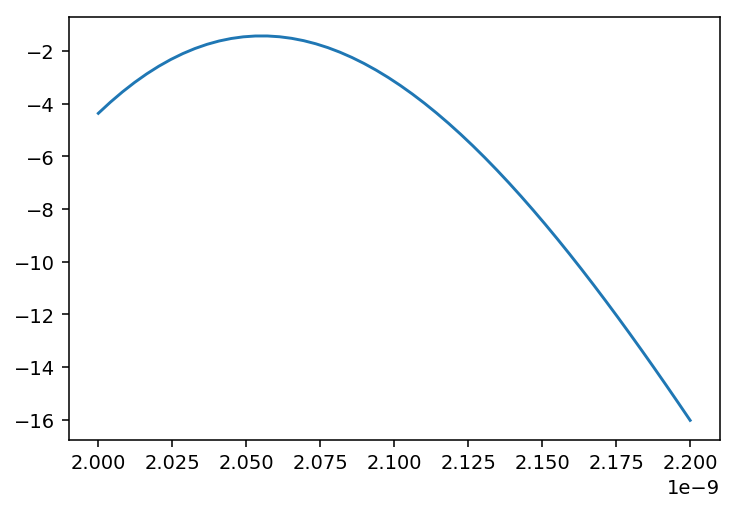

In [13]:
plt.plot(list_As,list_log_like)